# Test WITSML Parsing first

import all required packages

In [1]:
# Import required libraries & packages
#from azure.storage.blob import BlockBlobService
import os
import pandas as pd
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.widgets import Cursor


from mpl_toolkits.mplot3d import Axes3D



open directory
loop through xml files in folder, append to dataframe

In [35]:
## Open F15 well log file 
### C:\Users\fmazl\Documents\ibm\volve\test\f15\3
#### time based gentime
directory = r"C:\Users\fmazl\Documents\ibm\volve\test\f15\witsml\2\1"
#f15
#C:\Users\fmazl\Documents\ibm\volve\test\f15\witsml\2\1
#f15b
# r"C:\Users\fmazl\Documents\ibm\volve\test\f15b\log\1\1"
# f5
#r"C:\Users\fmazl\Documents\ibm\volve\test\F5\witsml\1\log\1\1- 17.5\1"
df =pd.DataFrame()
#WITSML_file = r"C:\Users\fmazl\Documents\ibm\volve\test\F5\witsml\1\log\1\1- 17.5\1\00008.xml"
#"C:\Users\fmazl\Documents\ibm\volve\test\f15\3\00001.xml"
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".xml"):
        full_path = os.path.join(directory, filename)
# Reading the WITSML file
        with open(full_path) as f:
            data = f.read()
            ## Parse the WITSML file using the Beautiful library
            soup = BeautifulSoup(data, 'xml')
            set([str(tag.name) for tag in soup.find_all()])
            # Print the tags in the file
            temp = set([str(tag.name) for tag in soup.find_all()])

            ## Process the log files
            # Get name of logs in the file
            log_names = soup.find_all('mnemonicList')
            
            # The units in the file
            unit_names = soup.find_all('unitList')
            
            # Define that the header is the 'mnemonic - unit' this simiplifies the pandas dataframe format
            header = [i + ' - ' + j for i, j in zip(log_names[0].string.split(","), unit_names[0].string.split(","))]
            
            # define out pandas dataframe - the columns are the header - a concatenation of the mnemonic and the unit, the data is parsed by looping over every
            # list found under the data tag.
            data = soup.find_all('data')
            df_temp = pd.DataFrame(columns=header,data=[row.string.split(',') for row in data])
            df = df.append(df_temp)
            
# replace blank values with nan
df = df.replace('', np.NaN)


#print (soup.find_all('mnemonicList')[0].text)



In [36]:
df


,TIME - s,ROP -,P40H_COND_RT -,PD_GRAV_BHC -,GS_G_NC5 -,GS_TV01 - m3,GS_TV05 - m3,MSP4 - unitless,TSPM -,SIG_SPP5s -,...,STIS -,GS_TV08 - m3,GS_TV11 - m3,ATMP_RT -,SHKRSK_RT -,A40H_UNC_RT -,PMPT -,GS_BPOS - m,MSP5 - unitless,BVEL -
0,2008-12-08T13:47:20.026Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2008-12-08T18:20:33.043Z,NaN,NaN,NaN,NaN,0,12.2769566939219,0.52,NaN,NaN,...,NaN,13.7979957121753,80.7500000427831,NaN,NaN,NaN,NaN,12.6599999784,0,NaN
2,2008-12-08T18:20:37.968Z,NaN,NaN,NaN,NaN,0,12.2769566939219,0.52,NaN,NaN,...,NaN,13.7979957121753,80.7500000427831,NaN,NaN,NaN,NaN,12.6599999784,0,NaN
3,2008-12-08T18:20:47.040Z,NaN,NaN,NaN,NaN,0,12.2769566939219,0.52,NaN,NaN,...,NaN,13.7979957121753,80.7500000427831,NaN,NaN,NaN,NaN,12.6599999784,0,NaN
4,2008-12-08T18:20:51.014Z,NaN,NaN,NaN,NaN,0,12.2769566939219,0.52,NaN,NaN,...,NaN,13.7979957121753,80.7500000427831,NaN,NaN,NaN,NaN,12.6599999784,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,2008-12-18T21:33:23.040Z,NaN,NaN,NaN,NaN,3.71354344171684,14.3020405369611,0.02,NaN,NaN,...,NaN,11.2261216034291,0.940000033890288,NaN,NaN,NaN,NaN,16.8099995016,0,NaN
877,2008-12-18T21:33:27.014Z,NaN,NaN,NaN,NaN,3.71354344171684,14.3020405369611,0.02,NaN,NaN,...,NaN,11.2261216034291,0.930000050443296,NaN,NaN,NaN,NaN,16.8099995016,0,NaN
878,2008-12-18T21:33:32.026Z,NaN,NaN,NaN,NaN,3.71354344171684,14.3020405369611,0.02,NaN,NaN,...,NaN,11.2225593441278,0.940000033890288,NaN,NaN,NaN,NaN,16.8099995016,0,NaN
879,2008-12-18T21:33:36.000Z,NaN,NaN,NaN,NaN,3.71354344171684,14.3020405369611,0.02,NaN,NaN,...,NaN,11.2225593441278,0.940000033890288,NaN,NaN,NaN,NaN,16.8099995016,0,NaN


In [37]:
list(df.columns)

['TIME - s',
 'ROP - ',
 'P40H_COND_RT - ',
 'PD_GRAV_BHC - ',
 'GS_G_NC5 - ',
 'GS_TV01 - m3',
 'GS_TV05 - m3',
 'MSP4 - unitless',
 'TSPM - ',
 'SIG_SPP5s - ',
 'GS_RPM - rpm',
 'PDSHKRSK - ',
 'GS_TV07 - m3',
 'ACTC - ',
 'GS_TV03 - m3',
 'FVOC - m3',
 'ROP30s - ',
 'GS_G_C1 - ',
 'GS_DCHM - ',
 'RSUX - m/s',
 'PD_TFDS - ',
 'SWOB - ',
 'DBTV - ',
 'P28H_UNC_RT - ',
 'GS_TV14 - m3',
 'GS_SPPA - kPa',
 'INCL_CONT_RT - ',
 'GS_SPM2 - 1/s',
 'GS_SPM3 - 1/s',
 'PASS_NAME - ',
 'GS_TV02 - m3',
 'GS_DBTM - m',
 'TRPM_RT - ',
 'A40H_COND_RT - ',
 'PDTF - ',
 'VIBLAT_RT - ',
 'VIBX_RT - ',
 'MBOT - ',
 'GS_DMEA - m',
 'DCHV - ',
 'BONB - ',
 'GS_CFIA - m3/h',
 'PD_RTSTAT - ',
 'PDSTEER - ',
 'BITRUN - ',
 'P28H_COND_RT - ',
 'GS_TVA - m3',
 'AZIM_CONT_RT - ',
 'A28H_COND_RT - ',
 'SHK2_RT - ',
 'DRPM - ',
 'PDINCL - ',
 'PD_PRDS - ',
 'GS_GASA - %',
 'APRS_RT - ',
 'SHKPK_RT - ',
 'TCHR - ',
 'GS_G_IC5 - ',
 'GS_MWTI - g/cm3',
 'ROP5 - ',
 'GS_DVER - m',
 'DEPT - ',
 'TFLO - ',
 'DMEA - ',


1) take required data headers
2) remove NaN
3) convert Dtype

In [38]:
#create custom DF for required headers (Hole Depth, bit depth,ROP,hookload,flow in,standpipe and TDS RPM)
# DMEA, DBTM, ROP5, HKLD, TFLO, SPPA, RPM
#df_depth = df["Depth - m","BITDEP - m"]
#header for f5
#df_depth = df[['TIME - s','DMEA - m','DBTM - m','ROP5 - ', 'BPOS - m','HKLD - kkgf','SWOB - kkgf','TFLO - L/min','SPPA - kPa','RPM - rpm']]
#header for f15b
df_depth = df[['TIME - s','GS_DMEA - m','GS_DBTM - m','ROP5 - ', 'GS_BPOS - m','GS_HKLD - t','GS_SWOB - t','GS_TFLO - L/min','GS_SPPA - kPa','GS_RPM - rpm']]
df_depth.dropna()


#convert dtype
df_depth['TIME - s'] = pd.to_datetime(df_depth['TIME - s'])
df_depth.iloc[:,1:9] = df_depth.iloc[:,1:9].astype(float, errors='raise')

df_depth.dtypes
#df_depth

<ipython-input-38-7b50cb1aa0a5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depth['TIME - s'] = pd.to_datetime(df_depth['TIME - s'])
c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


TIME - s           datetime64[ns, UTC]
GS_DMEA - m                    float64
GS_DBTM - m                    float64
ROP5 -                         float64
GS_BPOS - m                    float64
GS_HKLD - t                    float64
GS_SWOB - t                    float64
GS_TFLO - L/min                float64
GS_SPPA - kPa                  float64
GS_RPM - rpm                    object
dtype: object

In [39]:
df_depth = df_depth.fillna(method='ffill', limit=3)

df_depth

,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm
0,2008-12-08 13:47:20.026000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-12-08 18:20:33.043000+00:00,4090.350098,1237.989990,NaN,12.66,102.461089,0.0,240.600007,217.000006,0
2,2008-12-08 18:20:37.968000+00:00,4090.350098,1237.989990,NaN,12.66,102.175561,0.0,430.390015,244.000007,0
3,2008-12-08 18:20:47.040000+00:00,4090.350098,1237.989990,NaN,12.66,102.552859,0.0,748.090025,197.000005,0
4,2008-12-08 18:20:51.014000+00:00,4090.350098,1237.989990,NaN,12.66,102.359111,0.0,907.460023,343.000007,0
...,...,...,...,...,...,...,...,...,...,...
876,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,NaN,16.81,179.286512,0.0,776.530030,1228.999995,0
877,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,NaN,16.81,179.215124,0.0,776.530030,1243.000028,0
878,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,NaN,16.81,178.939797,0.0,776.530030,1244.999983,0
879,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,NaN,16.81,178.858217,0.0,776.530030,1268.000031,0


Data Exploration
1)check time length of dataset
2) average time step


In [40]:
#get first and last time stamp
first_timestamp = df_depth['TIME - s'].min()
last_timestamp = df_depth['TIME - s'].max()
Total_time = last_timestamp - first_timestamp

Average_timestep = (last_timestamp-first_timestamp)/(df_depth['TIME - s'].count())


print("Initial time for dataset: ",first_timestamp)
print("Final time for dataset: ",last_timestamp)
print("Total time for dataset: ", Total_time )

# Calculate the difference between rows - By default, periods = 1
timestep = df_depth['TIME - s'].diff()
Average_timestep = timestep.mean()
print("average time step: " , Average_timestep)

Initial time for dataset:  2008-12-08 13:47:20.026000+00:00
Final time for dataset:  2008-12-18 21:33:41.011000+00:00
Total time for dataset:  10 days 07:46:20.985000
average time step:  0 days 00:00:02.471683066


### Graphing out log file

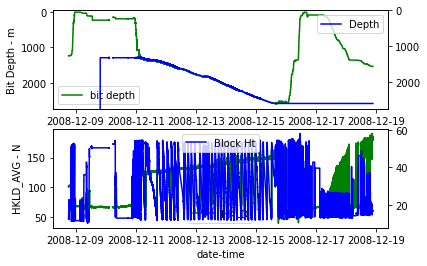

In [44]:
#note on header
#df[['TIME - s','DMEA - m','DBTM - m','ROP5 - ', 'BPOS - m','HKLD - kkgf','TFLO - L/min','SPPA - kPa','RPM - rpm']]
fig, axs = plt.subplots(2)
x1= df_depth['TIME - s']
y1= df_depth['GS_DBTM - m']
y2 = df_depth['GS_DMEA - m']
#x1= df_depth.loc[40000:55000,['TIME - s']]
#y1= df_depth.loc[40000:55000,['DBTM - m']]
#y2 = df_depth.loc[40000:55000,['DMEA - m']]


#subplot 1
axs[0].plot(x1,y1,'g', label ='bit depth')
#axs[0].plot(x1,y2,'b', label ='Depth')
ax2= axs[0].twinx()
ax2.plot(x1,y2,'b',label='Depth')
#axs[0].plot(x1,y2,'b', label ='depth')

axs[0].set_ylim(2750,-50)
ax2.set_ylim(2750,0)

axs[0].set_ylabel('Bit Depth - m')
axs[0].set_xlabel('date-time')
axs[0].legend()
ax2.legend()

#df_depth = df[['TIME - s','GS_DMEA - m','GS_DBTM - m','ROP5 - ', 'GS_BPOS - m','GS_HKLD - t','GS_SWOB - t','GS_TFLO - L/min','GS_SPPA - kPa','GS_RPM - rpm']]


#subplot 2
x1= df_depth['TIME - s']
y1= df_depth['GS_HKLD - t']
y2 = df_depth['GS_BPOS - m']
#x1= df_depth.loc[40000:55000,['TIME - s']]
#y1= df_depth.loc[40000:55000,['HKLD - kkgf']]
#y2 = df_depth.loc[40000:55000,['BPOS - m']]

axs[1].plot(x1,y1,'g', label ='HKLD')
ax3=axs[1].twinx()
ax3.plot(x1,y2,'b', label ='Block Ht')
#axs[1].set_ylim(1500,-50)
axs[1].set_ylabel('HKLD_AVG - N')
axs[1].set_xlabel('date-time')
axs[1].legend(loc=8)
ax3.legend(loc=9)

#cursor = Cursor(ax, useblit = True, color ='red',
               # linewidth = 2)



plt.show()

In [51]:
#save to xls
from openpyxl.utils.dataframe import dataframe_to_rows
rows = dataframe_to_rows(df)

#for r_idx, row in enumerate(rows, 1):
#    for c_idx, value in enumerate(row, 1):
#         ws.cell(row=r_idx, column=c_idx, value=value)

#full_path = os.path.join(directory, filename)
#WITSML_file = r"C:\Users\fmazl\Documents\ibm\volve\test\f15\3\00001.xml"
save_directory = r"C:\Users\fmazl\Documents\ibm\volve\test\f15\csv"
#f15
#r"C:\Users\fmazl\Documents\ibm\volve\test\f15b\csv"
#savepath =  r'C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\3\ '

#f15 r"C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\3"

#df.to_csv(savepath + r'\File Name.csv')
i = 2
#filenum = str(i) + (r'.xlsx')
filenum = str(i) + (r'.csv')
#savepath = savepath + (filenum) + (r'.csv')
savepath = os.path.join(save_directory,filenum)
print(savepath)

#wb.save(savepath + '.xls')
#df_depth.to_excel(savepath + '.xlsx', index=False)
df_depth.to_csv(savepath , index=False)

C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\2.csv
